# What is Daft?

## Python Library

You can install Daft easily with `pip`:

In [ ]:
!pip install daft

## Cloud-Native Dataframe API

You can easily read from various sources of data (including cloud object storage) into a Dataframe.

See ([Daft API Documentation: Input/Output](https://www.getdaft.io/projects/docs/en/latest/api_docs/input_output.html))

In [2]:
import daft

daft.set_planning_config(default_io_config=daft.io.IOConfig(s3=daft.io.S3Config(anonymous=True)))

# Glob a path and return file listing as a Dataframe
df = daft.from_glob_path("s3://daft-public-data/laion-sample-images/*")

# Daft also supports reading from many other sources:
# df = daft.read_csv(...)
# df = daft.read_parquet(...)
# df = daft.read_json(...)
# df = daft.read_iceberg(...) # <Coming Soon!>

In [3]:
df.show(3)

╭────────────────────────────────┬───────┬──────────╮
│ path                           ┆ size  ┆ num_rows │
│ ---                            ┆ ---   ┆ ---      │
│ Utf8                           ┆ Int64 ┆ Int64    │
╞════════════════════════════════╪═══════╪══════════╡
│ s3://daft-public-data/laion-s… ┆ 54937 ┆ None     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ s3://daft-public-data/laion-s… ┆ 56448 ┆ None     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ s3://daft-public-data/laion-s… ┆ 66768 ┆ None     │
╰────────────────────────────────┴───────┴──────────╯

(Showing first 3 rows)

In [8]:
# All the other dataframe operations that you would expect:
#
# 1. df.join(...)
# 2. df.sort(...)
# 3. df.with_column(...)
# 4. df.where(...)

## Complex Data Types/Rust Core

Daft supports representing and performing operations on complex types such as URLs and images natively.

These operations are **defined** in Python, but **executed** using our Rust core library.

See ([Daft Documentation: Expressions](https://www.getdaft.io/projects/docs/en/latest/learn/user_guides/expressions.html))

In [34]:
df = df.with_column("data", df["path"].url.download())  # Utf8 -> Binary
df = df.with_column("image", df["data"].image.decode())  # Binary -> Image

In [ ]:
df.show(3)

## Distributed Execution

Daft supports execution locally on a Python multithreaded backend, or on a Ray cluster.

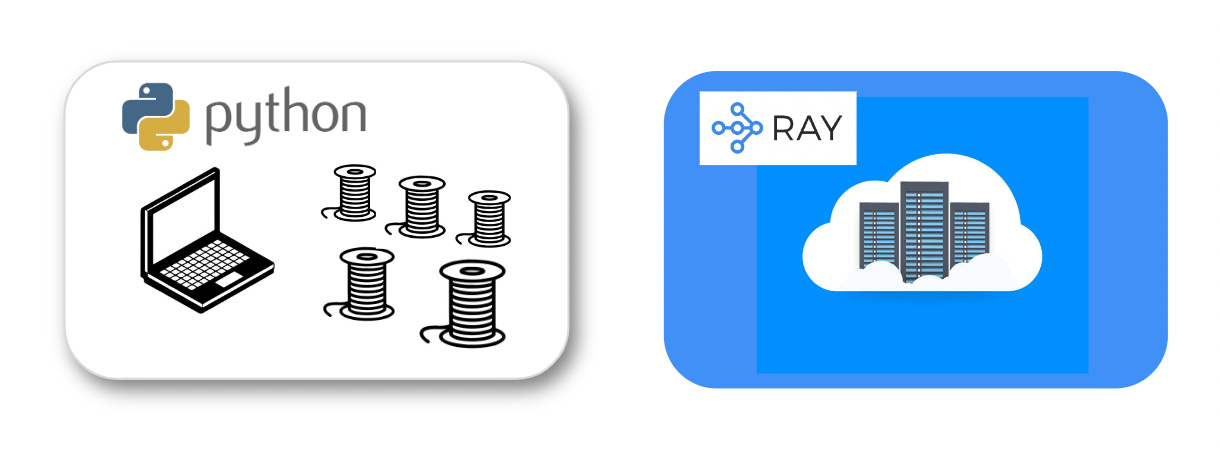

See ([Daft Documentation: Distributed Computing](https://www.getdaft.io/projects/docs/en/latest/user_guide/poweruser/distributed-computing.html))

In [ ]:
## Use the Native multithreaded local runner (default behavior)
# daft.context.set_runner_native()

## Connect to a Ray cluster and use the Ray runner
# daft.context.set_runner_ray(address="ray://...")

## Intelligent Optimizations

Daft provides intelligent optimizations for you to speed up your queries.

In [36]:
df = daft.read_parquet("s3://daft-public-data/benchmarking/lineitem-parquet/")
df = df.select(df["L_ORDERKEY"], df["L_DISCOUNT"])

In [39]:
# df.explain()
# df.explain(show_all=True)

In [40]:
%%time

df.show()

╭────────────┬────────────╮
│ L_ORDERKEY ┆ L_DISCOUNT │
│ ---        ┆ ---        │
│ Int64      ┆ Float64    │
╞════════════╪════════════╡
│ 18749989   ┆ 0          │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 18749989   ┆ 0.03       │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 18749989   ┆ 0.01       │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 18749990   ┆ 0.02       │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 18749990   ┆ 0.06       │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 18749990   ┆ 0.04       │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 18749990   ┆ 0.05       │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 18749990   ┆ 0.1        │
╰────────────┴────────────╯

(Showing first 8 rows)

CPU times: user 213 ms, sys: 121 ms, total: 334 ms
Wall time: 3.62 s
